# **Preprocesamiento de datos**

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # Se usarán las 10,000 palabras más comunes de la base de datos
maxlen = 500  # Usaremos solamente las primeras 500 palabras de cada crítica
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# **Definimos el modelo**

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN #RNN -> Recurrent Neural Network
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor= 'val_acc', mode='max', patience = 7, verbose=1)
mc = ModelCheckpoint('/content/model_rnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks = [es, mc])

Epoch 1/10
157/157 [==============================] - 24s 150ms/step - loss: 0.6785 - acc: 0.5573 - val_loss: 0.6300 - val_acc: 0.6544
Epoch 2/10
157/157 [==============================] - 23s 144ms/step - loss: 0.4548 - acc: 0.7985 - val_loss: 0.4191 - val_acc: 0.8176
Epoch 3/10
157/157 [==============================] - 23s 143ms/step - loss: 0.3136 - acc: 0.8732 - val_loss: 0.4307 - val_acc: 0.8234
Epoch 4/10
157/157 [==============================] - 23s 147ms/step - loss: 0.2689 - acc: 0.8979 - val_loss: 0.3455 - val_acc: 0.8710
Epoch 5/10
157/157 [==============================] - 22s 143ms/step - loss: 0.1753 - acc: 0.9363 - val_loss: 0.3975 - val_acc: 0.8500
Epoch 6/10
157/157 [==============================] - 23s 144ms/step - loss: 0.1204 - acc: 0.9580 - val_loss: 0.4601 - val_acc: 0.8150
Epoch 7/10
157/157 [==============================] - 23s 145ms/step - loss: 0.0753 - acc: 0.9754 - val_loss: 0.4764 - val_acc: 0.8516
Epoch 8/10
157/157 [==============================] - 2

# **Curvas de precisión y pérdida**

Best accuracy epoch :  4, Value :  0.8709999919
Best loss epoch :  4, Value :  0.3455053568


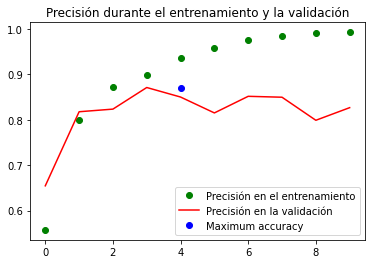

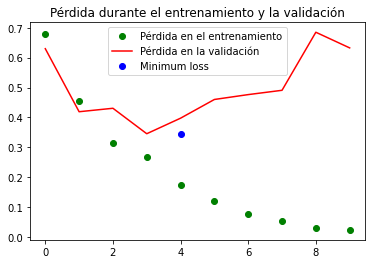

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

# **Implementación de una LSTM**

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

es = EarlyStopping(monitor= 'val_acc', mode='max', patience = 7, verbose=1)
mc = ModelCheckpoint('/content/model_lstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks = [es, mc])

Epoch 1/10
157/157 [==============================] - 53s 336ms/step - loss: 0.5509 - acc: 0.7371 - val_loss: 0.8682 - val_acc: 0.6256
Epoch 2/10
157/157 [==============================] - 56s 355ms/step - loss: 0.3121 - acc: 0.8756 - val_loss: 0.3430 - val_acc: 0.8532
Epoch 3/10
157/157 [==============================] - 56s 354ms/step - loss: 0.2442 - acc: 0.9087 - val_loss: 0.4087 - val_acc: 0.8350
Epoch 4/10
157/157 [==============================] - 55s 352ms/step - loss: 0.2134 - acc: 0.9220 - val_loss: 0.3352 - val_acc: 0.8506
Epoch 5/10
157/157 [==============================] - 60s 381ms/step - loss: 0.1822 - acc: 0.9340 - val_loss: 0.3543 - val_acc: 0.8648
Epoch 6/10
157/157 [==============================] - 55s 351ms/step - loss: 0.1638 - acc: 0.9417 - val_loss: 0.3438 - val_acc: 0.8788
Epoch 7/10
157/157 [==============================] - 55s 353ms/step - loss: 0.1496 - acc: 0.9457 - val_loss: 0.3250 - val_acc: 0.8808
Epoch 8/10
157/157 [==============================] - 5

# **Curvas de precisión y pérdida**

Best accuracy epoch :  4, Value :  0.8709999919
Best loss epoch :  4, Value :  0.3455053568


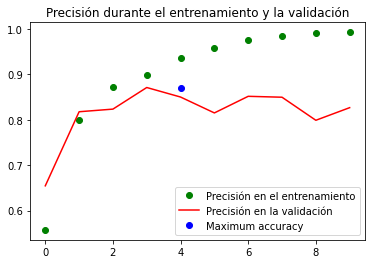

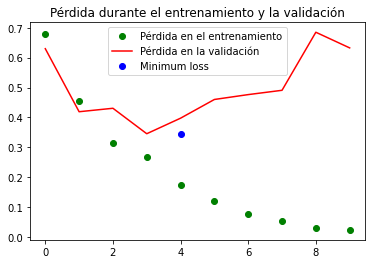

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

# **Bibliografía sugerida:** <br>
https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21 <br>
Libro: Deep Learning with Python, de François Chollet